# What is a Neural Network?

A **neural network** in machine learning is a model inspired by how the human brain processes information. It's made up of layers of simple processing units called **neurons**, which are organized in a structure that can learn patterns from data.

A typical neural network has:
- **Input layer**: takes the raw data (like pixels in an image or features in a dataset)
- **Hidden layers**: perform transformations and extract patterns
- **Output layer**: gives the final prediction (e.g., class label, value)

Each **neuron** in a layer:
- Receives inputs
- Applies a **weight** to each input
- Sums them up, adds a **bias**
- Passes the result through an **activation function** (like ReLU or sigmoid)

# How a neuron works?

A neuron receives n+1 inputs: $x=\begin{pmatrix} x_{0}=1 & x_{1} & x_{2} & ... & x_{n} \end{pmatrix}$ (where $x_{0}=1$ is added by us to simplify the calculations with the bias $\theta_{0}$). It has a weights vector: $\theta=\begin{pmatrix} \theta_{0} & \theta_{1} & \theta_{2} & ... & \theta_{n} \end{pmatrix}$.

The neuron computes its output in two steps:
1) The neuron calculates a **weighted sum** of the inputs with a **bias** term:

$$
z = \theta_{0}\underbrace{x_{0}}_{=1} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}
$$

Or more compactly (in vector form):

$$
z = \theta^{T}x
$$

2) The result `z` is passed through an **activation function** to introduce non-linearity. Common choices:
- **Sigmoid**: squashes output to range (0, 1)
- **ReLU**: outputs 0 if z < 0, otherwise z
- **Tanh**: outputs between -1 and 1

So overall, a neuron transforms inputs like this:

$$
output = activation(\theta^{T}x)
$$

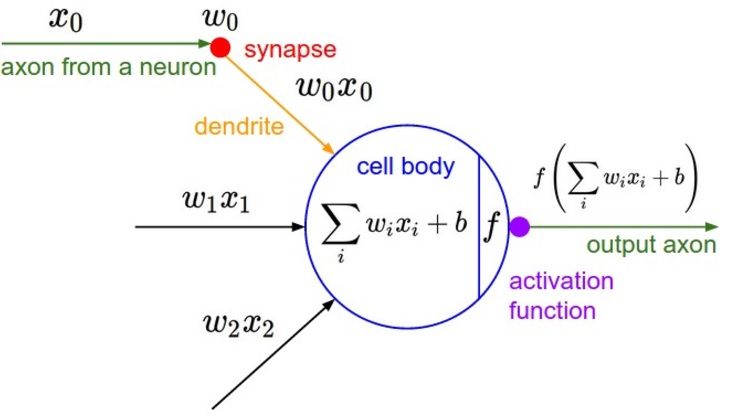

This output can be used directly (e.g., for a prediction) or passed on as input to other neurons in deeper layers.

# General structure of a neural network

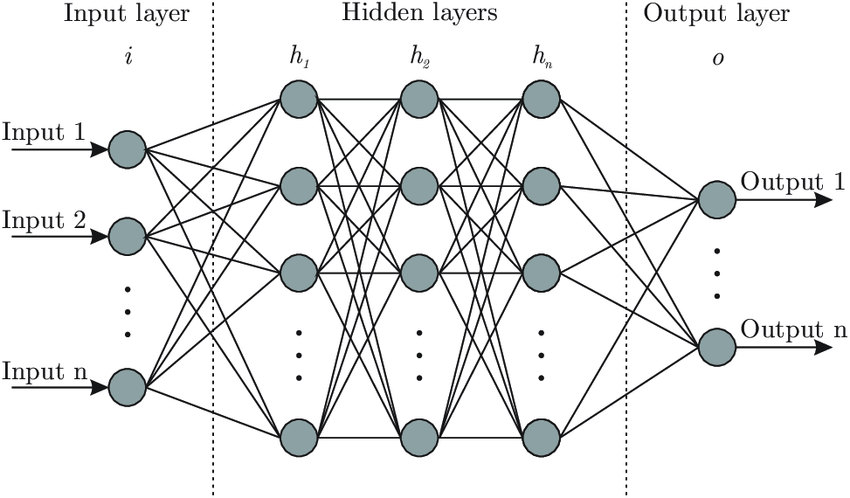

# Training a neural network on the MNIST dataset

**MNIST** (Modified National Institute of Standards and Technology database) is a **benchmark dataset** in machine learning, especially used for **image classification** and computer vision.

What’s in MNIST?

- **Images**: 70,000 grayscale images of **handwritten digits** (0 through 9)
  - **60,000** for training
  - **10,000** for testing
- **Image size**: 28 × 28 pixels (784 total pixels per image)
- **Labels**: Each image is labeled with the correct digit (0 to 9)

Why is MNIST important?

- It’s often the **"Hello World"** of deep learning and neural networks.
- Used to test and compare models like:
  - Logistic regression
  - Fully connected neural networks
  - Convolutional Neural Networks (CNNs)
- Simple enough to train on a laptop but complex enough to test meaningful learning.

### Setup

In [20]:
# Install dependencies as needed:
%pip install kagglehub
%pip install matplotlib
%pip install numpy
%pip install scikit-learn
%pip install torch
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------------------ --- 1.6/1.7 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 11.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
#Import dependencies
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

### Importing the dataset

In [12]:
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Arthur\.cache\kagglehub\datasets\oddrationale\mnist-in-csv\versions\2


In [17]:
train_file_path = "mnist_train.csv"
train_df = pd.read_csv(os.path.join(path, train_file_path), delimiter=',')

test_file_path = "mnist_test.csv"
test_df = pd.read_csv(os.path.join(path, test_file_path), delimiter=',')

In [18]:
print("First 5 records:", train_df.head())

First 5 records:    label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [21]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|█████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:01<00:00, 23.6MB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 420kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:00<00:00, 7.42MB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<?, ?B/s]


# Building our neural network

Our neural network will have the following architecture:

- Input layer: 785 input units for the 784 input pixels of each image.
- Hidder layer: 3 unit activated by ReLU activation function.
- Output layer: 10 units for the 10 digit classes output probability.

In [ ]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)